In [2]:
import tensorflow as tf

## 학습 관련 기술들

- 확률적 경사 하강법

    - SGD(Stochastic Gradent Descent)라고도 한다.
    
    $$w = w-n\frac{\partial L}{\partial W}$$
    
        - n은 LEARNING RATE를 이야기하고, 저 분수는 W에 대한 기울기를 이야기한다, 그리고 이들은 계산되면 W를 업데이트한다.
        
    - 이는 기울어진 방향으로 가겠다는 가장 단순한 방법이다.
    
    - 그러나 이것의 단점은, 비동방성 함수(방향에 따라 성질이 달라지는)에서는 탐색 경로가 비 효율적이다.

- 모멘텀

    $$v = av-n\frac{\partial L}{\partial W}$$
    
    $$W = W + v$$
    
    - 이건 물리와 밀접한 관련이 있다, 식에 있는 v라는 변수가 새로 나오는데, 이는 물리에서 말하는 속도에 해당한다.
    
        - 앞에서 사용했던 건 양수라면 밑으로 음수라면 위로 간다는 식이였는데, 이건 공을 위에서 떨어뜨렸을때 물리적인 힘에 의해서 튕겨나가는 것을 볼 수 있다. 
        
        - 그래서 av항은 물체가 아무런 힘을 받지 않을 대 서서히 하강시키는 역할을 한다.
        
        - v항은 물체의 속도를 이야기한다, 
        
    - 그래프를 보면 갱신 경로가 공이 구르듯이 갱신되는 것을 볼 수 있다, SGD와 비교하면 지그재그 정도가 덜 한것을 알 수 있다.
    
        - 이유는 한 방향으로 일정하게 가속되는 것이다.
        
        - 전체적으로는 SGD보다 x축 방향으로 뻐르게 다가가 지그재그 움직임이 줄어든다. 

- Adagrad

    - 크게 다른건 없지만, 이건 Learning Rate Decrease가 가장 큰 것이다, Learning Rate는 신경망 학습에서 가장 큰 성공, 실패 요인이라고 할 수 있다. ~~잘되면 내탓 안되면 니탓~~
    
    - 그래서 이 학습률을 정하는 효과적 기술로 위에서 이야기하는 학습률 감소(Learning Rate Decrease)라는 것을 사용하고 있는 것이다.
    
    - 조언 하나 하자면, 이 아다그래드는 학습을 계속 할수록 갱신 강도가 약해지는데, 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어서 전혀 갱신되지 않게 된다. 
    
        - 그래서 여기에서는 RMSProp라는 것을 사용하는걸 권장하는데, 이것은 먼 과거의 기울기는 작게 반영하고, 새로운 기울기를 크게 반영하는 것을 이야기한다. 
        
        - 이를 지수이등평균 이라고 한다.
        
    - 그래프를 참고하면 갱신 강도가 빨라지고, 지그재그의 강도가 덜해진 것을 볼 수 있다.

- Adam

    - 모멘텀과 아다그래드 방식을 융합한 것이다.
    
    - 이론은 엄청 복합하지만, 직관적으로는 모맨텀과 AdaGrad를 융합한 듯한 방법이다
    
    - 그래프를 참고하면, 그래프가 그릇 방향을 구르듯 움직인다.

- 어떤 갱신 방법을 사용해야 하는가?

    - 지금까지는 그런 방법이 없다, 다만 많은 분들이 Adam에 만족해하며 사용하시는거 같다. 
    
    - 각자의 상황에 고려하여 여러 가지로 시도해 보는게 좋다.
    
### 시각화 해보면 이렇습니다

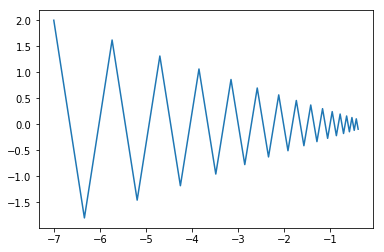

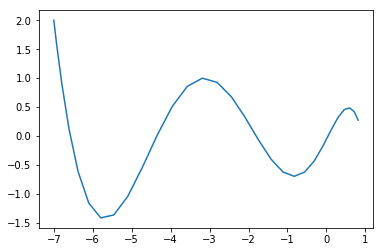

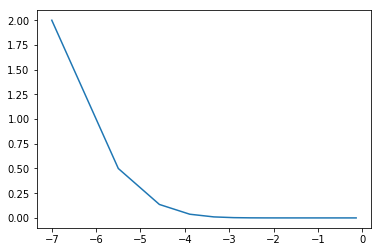

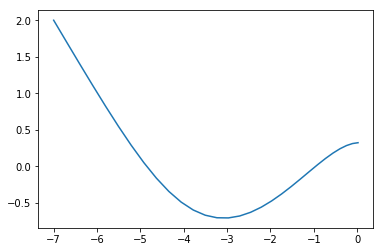

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
		
    plt.plot(x_history, y_history)
    plt.show()

### 가중치의 초기값을 설정하는 방법

- 초깃값을 0으로 하면 어떨까

    - 이는 나쁜 아이디어다, 실제로 가중치 초깃값을 0으로 하면 학습이 올바로 이루어지지 않는다.
    
    - 이유는 바로 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.
    
    - 그러기에 가중치가 고르게 되어버리는 상황을 막으려면 초깃값을 무작위로 설정해야 한다.
    
- Xavier 초깃값을 써보면 어떨까?

    - Xavier초깃값은 일반적인 딥러닝 프로젝트들이 표준적으로 이용하고 있다.
    
    - Xavier초깃값은 표준편차가 $\frac{1}{{\sqrt n}}$이 되도록 설정하는 방법이다.
    
    - 결과는 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 예상하고 있다.
    
        - 근데 Relu 함수는 어떻게 되지? 
        
            - 이럴때는 He초깃값을 사용하면 된다.
            
            - He(히)초깃값은 Relu에 특화된 초깃값이라고 할 수 있다. 
            
- 그래서 결론적으로 활성화 함수를 Relu를 사용할 때는 He초깃값을, Sigmoid 나 tanh등의 S자 모양 곡선일 때는 Xavier초깃값을 써야 한다고 결론을 낼 수 있다.

    - 이것이 현재의 모범 사례라고 할 수 있기 때문이다.
    
    - 그리고 무엇보다 **가중치 정규화**가 기계학습에서의 중요한 요인이라는걸 명심해야 한다.
    
### 배치 정규화

- 배치 정규화 알고리즘은 학습 속도 개선, 초깃값에 크게 의존하지 않음, 오버피팅 억제 등의 장점을 가지고 있다.

- 원리는 단순하다, **그냥 활성화값 분포를 균일하게 하도록 만들어버리면 되는 것이다**

- 배치 정규화를 사용해서 기계학습의 효과를 크게 끌어올린 사례도 있기 때문에, 사용하면 좋다.

- 배치 정규화가 학습을 빨리 이끌어 낸다고 한다.

    - 요즘의 딥러닝 라이브러리들은 다 쓰고 있지 않나 싶다...
    
### 바른 학습을 위해서는 어떻게 해야 할까? (Avoiding Overfitting)

- 오버피팅이라는건 이럴때 일어난다

    - 매개변수가 많고 표현력이 높은 모델 (초등학생한테 아무것도 모르면서 미적분 하라고 하는 꼴인가...)
    
    - 훈련 데이터가 적을때
    
- 오버피팅을 억제하려면 어떻게 할까?

    - 가중치를 감소시켜 버린다.
    
        - 간단하다, 학습할때 **"오 저기에 큰 가중치가 있네?"** 하고서는 그 가중치를 없애버리는 방법이다. 참 쉽죠?
        
        - 가중치의 제곱 법칙을 손실 함수에 더하면 가중치가 커지는 것을 억제할 수 있다.
        
    - 드롭아웃을 시켜버린다;
    
        - 앞에서 사용한건 **"신경망이 간단하게 있을때"**를 이야기하고, 이제 설명할것은 신경망이 복잡하고 촘촘하게 있을때 어떻게 하나를 설명하여 보겠다.
        
        - 이것도 저 위의 방법이랑 비슷하다, **"큰 가중치를 날려버리는 것처럼 학습시에 랜덤으로 뉴런을 날려버리는 것이다"** 참 쉽죠?
        
        - 단 시험(Test)때에는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력합니다.
        
        - 드롭아웃을 적용하니까 표현력도 높히면서도 오버피팅을 억제할 수 있다.
        
### 하이퍼파라메터 값을 잘 찾는 방법.

- 하이퍼파라메터 값이란 무엇인가?

    - 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등을 하이퍼파라메터 라고 한다.
    
    - 이것을 찾아내려면 많은 방법을 시도해 봐야 하기때문에 데이터 사이즈에 따라서 시간이 오래 걸린다.
    
        - 그래서 **Be Patient** 해야 하고, 사람이 보기에 **이건 안된다** 싶으면 과감하게 실행을 하지 않는걸 권장하고 있다.
        
    - 그리고 하이퍼파라메터의 성능을 테스트 할때는 하이퍼파라메터 전용 데이터를 가지고 학습을 해야 된다.
    
        - 왜냐하면 하이퍼파라메터 값의 좋음을 시험 데이터로 확인하게 되므로, 하이퍼파라메터의 값이 시험 데이터에만 적합하도록 조정되기 때문이다.
        
        - 그렇게 되면 다른 데이터에는 적용하지 못하니 범용 성능이 떨어지는 모델이 될지도 모른다.
        
    - 마지막으로 하이퍼파라메터를 지정할때는 대략적으로 지정하는 것이 효과적이다